In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Churn Prediction.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Churn Prediction.csv'

In [ ]:
df.duplicated().sum()

In [29]:
df.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [30]:
df.drop('customer_id', axis=1, inplace=True)
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [33]:
X = df.drop('churn', axis=1)
y = df['churn']

In [34]:
# Convert categorical variables to numerical using LabelEncoder
le = LabelEncoder()
for col in ['gender', 'country']:
    X[col] = le.fit_transform(X[col])

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [36]:
# Define hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8,10],
    'min_samples_split': [2, 4, 6, 8,10],
    'min_samples_leaf': [1, 2, 4, 8,10]}

In [37]:
# Create decision tree classifier
dtc = DecisionTreeClassifier()

In [38]:
# Perform grid search over hyperparameter grid
grid_search = GridSearchCV(dtc, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [1, 2, 4, 8, 10],
                         'min_samples_split': [2, 4, 6, 8, 10]})

In [20]:
# Print best hyperparameters and corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best score:  0.8551428571428572


In [39]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=1, min_samples_split=10)

In [40]:
# Train the model on the training data
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=10)

In [41]:
# Test the model on the testing data
y_pred = dt.predict(X_test)


In [42]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print('AUC:', auc)

Accuracy: 0.8496666666666667
Precision: 0.715
Recall: 0.4590690208667737
F1 score: 0.5591397849462366
AUC: 0.705554703954632


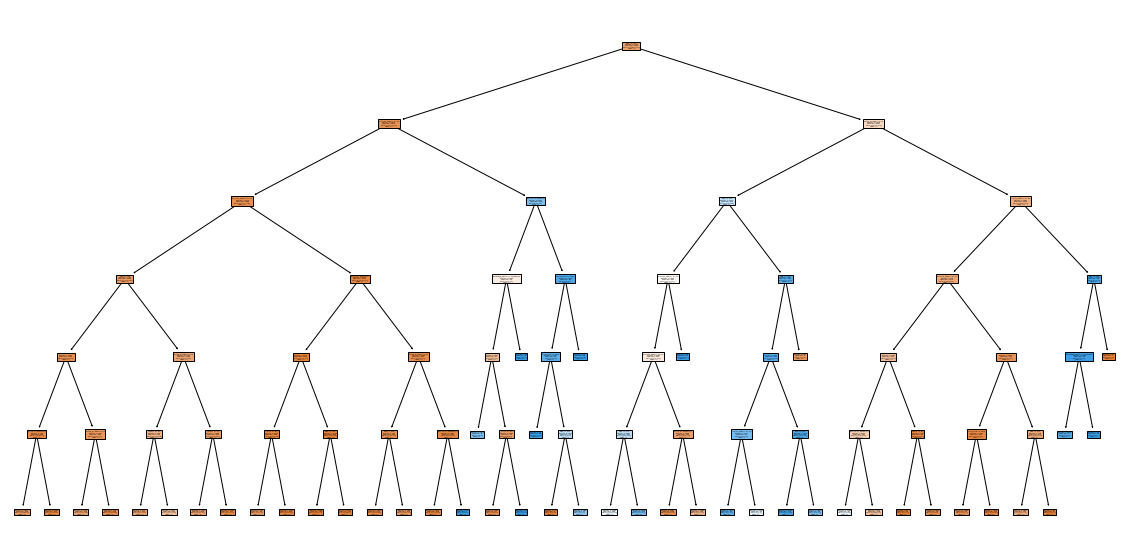

In [43]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=["0", "1"])
plt.show()

In [53]:
#2nd parameter 
dt2 = DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=8, min_samples_split=6)

In [54]:
# Train the model on the training data
dt2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=8,
                       min_samples_split=6)

In [55]:
# Test the model on the testing data
y_pred = dt2.predict(X_test)

In [56]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print('AUC:', auc)

Accuracy: 0.852
Precision: 0.7136038186157518
Recall: 0.4799357945425361
F1 score: 0.5738963531669865
AUC: 0.7147259957146841


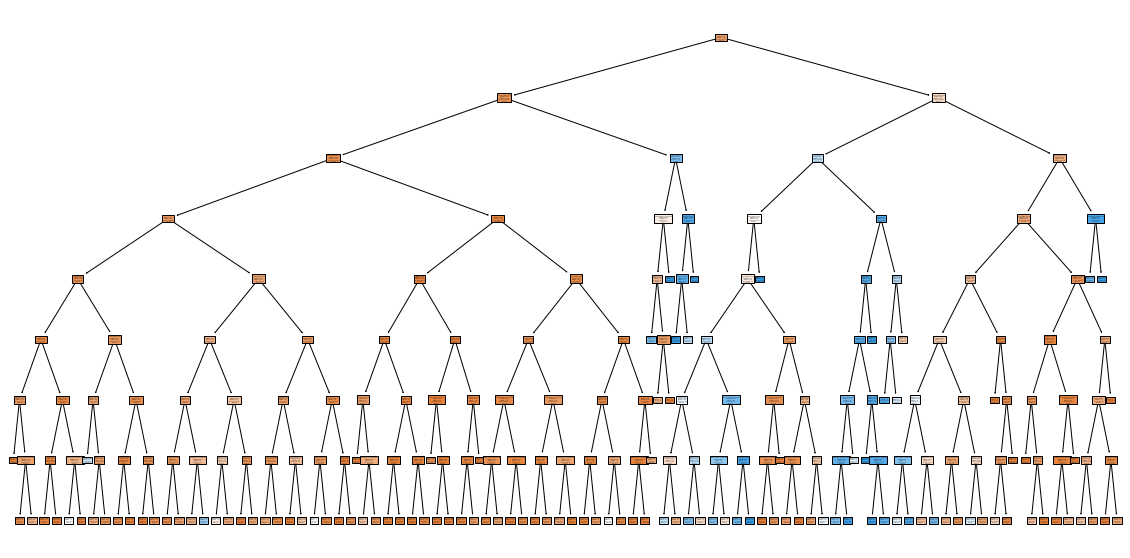

In [57]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(dt2, filled=True, feature_names=X.columns, class_names=["0", "1"])
plt.show()

In [58]:
#third parameter 
dt3 = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=1, min_samples_split=10)

In [59]:
# Train the model on the training data
dt3.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=10)

In [60]:
# Test the model on the testing data
y_pred = dt3.predict(X_test)

In [61]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print('AUC:', auc)

Accuracy: 0.8496666666666667
Precision: 0.715
Recall: 0.4590690208667737
F1 score: 0.5591397849462366
AUC: 0.705554703954632


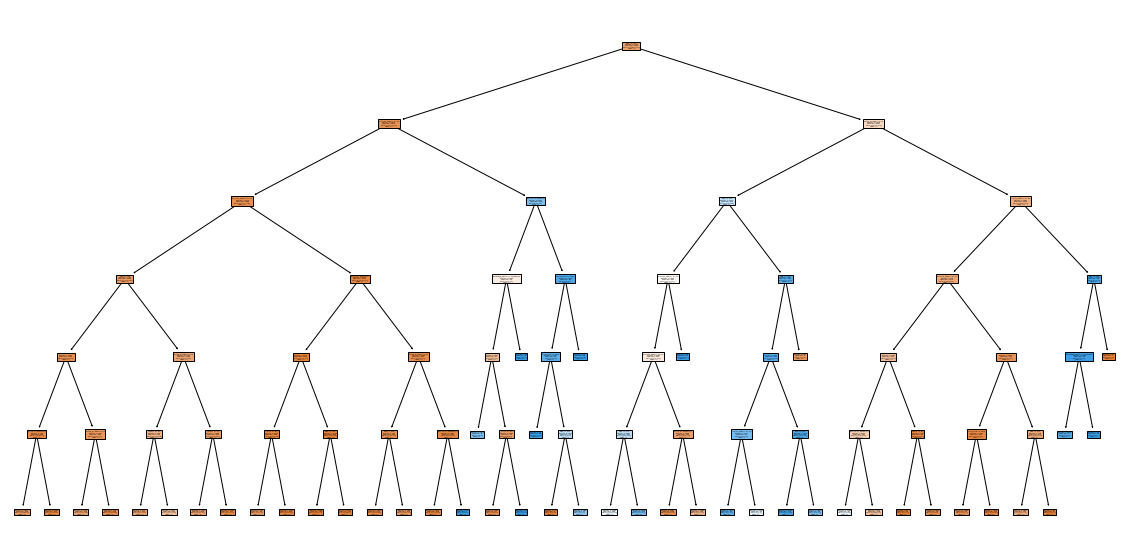

In [62]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(dt3, filled=True, feature_names=X.columns, class_names=["0", "1"])
plt.show()